In [ ]:
import pandas as pd

In [ ]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [ ]:
# nlp project
# 1. Data Cleaning
# 2. Data Preprocessing
# 3. Data Analysis
# 4. Data Visualization
# 5. Model Building
# 6. Model Evaluation
# 7. Model Deployment


In [ ]:
# 1. Data Cleaning
# 1.1. Check for missing values
print(fake_news.isnull().sum())
print(' ')
print(true_news.isnull().sum())


title      0
text       0
subject    0
date       0
dtype: int64
 
title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
# Dimension of the data
print(fake_news.shape)
print(true_news.shape)

(23478, 5)
(21211, 5)


In [ ]:
# 1.2. Check for duplicates
print(fake_news.duplicated().sum())
print(' ')
print(true_news.duplicated().sum())

# 1.3. Drop duplicates
fake_news = fake_news.drop_duplicates()
true_news = true_news.drop_duplicates()

3
 
206


In [ ]:
# 1.4. Add a column to identify fake and true news
fake_news['label'] = 0
true_news['label'] = 1

# 1.5. Merge the two datasets
news = pd.concat([fake_news, true_news], axis=0)

# 1.6. Drop columns that are not needed
# news = news.drop(['title', 'subject', 'date'], axis=1)

In [ ]:
# 1.7. Shuffle the dataset
news = news.sample(frac=1).reset_index(drop=True)

In [ ]:
# 2. Data Preprocessing
# 2.1. Remove special characters
news['text'] = news['text'].str.replace('[^a-zA-Z]', ' ')

# 2.2. Convert text to lowercase
news['text'] = news['text'].str.lower()

In [ ]:
# 2.3. Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
news['text'] = news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 2.4. Tokenization
from nltk.tokenize import word_tokenize
news['text'] = news['text'].apply(lambda x: word_tokenize(x))

# 2.5. Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
news['text'] = news['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# 2.6. Convert the text back to string
news['text'] = news['text'].apply(lambda x: ' '.join(x))

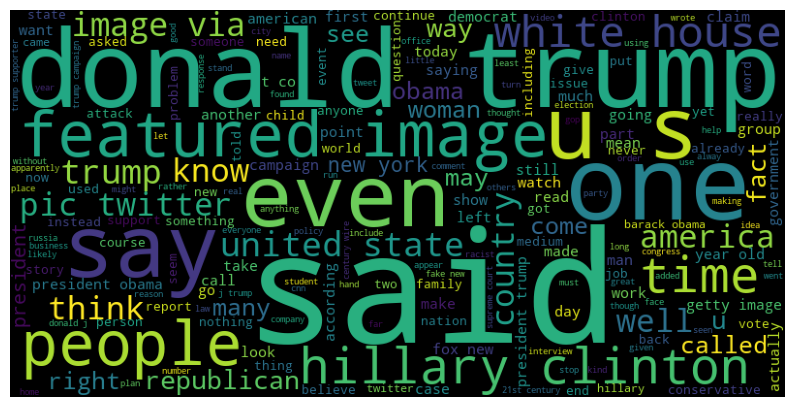

In [ ]:
# 3. Data Analysis
# 3.1. Word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fake_news_text = ' '.join(news[news['label'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400).generate(fake_news_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

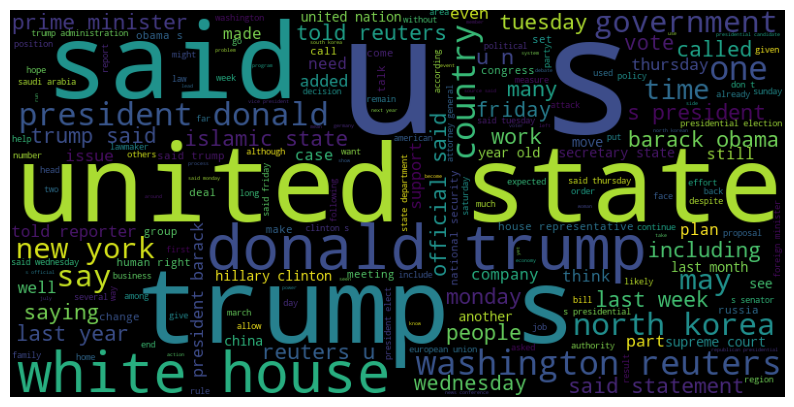

In [ ]:
# 3.2. Word cloud for true news
true_news_text = ' '.join(news[news['label'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400).generate(true_news_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

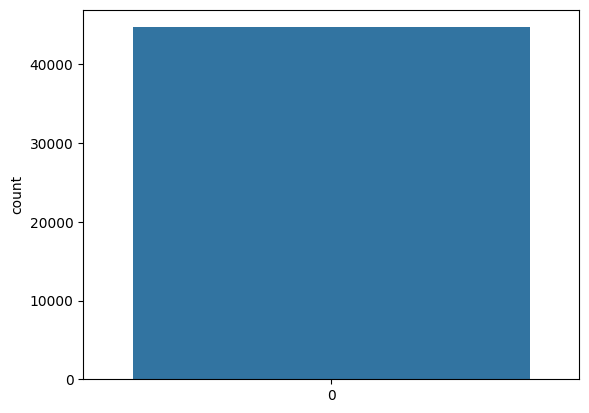

C:\Users\kusha\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


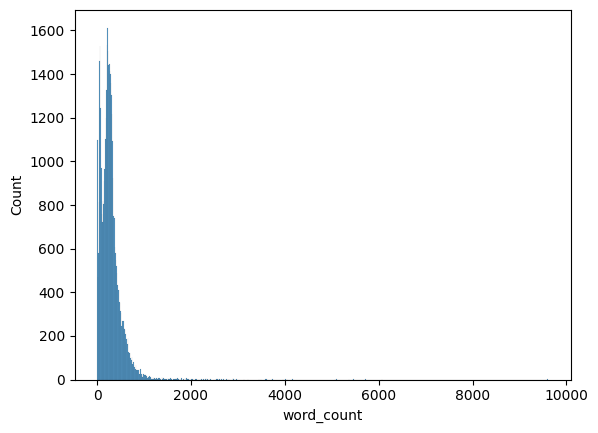

In [ ]:
# 4. Data Visualization
# 4.1. Count plot
import seaborn as sns
sns.countplot(news['label'])
plt.show()

# 4.2. Word count
news['word_count'] = news['text'].apply(lambda x: len(x.split()))
sns.histplot(news['word_count'])
plt.show()

In [ ]:
# 5. Model Building
# 5.1. Split the dataset
from sklearn.model_selection import train_test_split
X = news['text']
y = news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 5.2. Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
# 5.3. Model building: making a pipeline for multiple models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# Logistic Regression
log_reg = Pipeline([('log_reg', LogisticRegression())])
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Logistic Regression:', accuracy_score(y_test, y_pred))

# precision, recall, f1-score

print(classification_report(y_test, y_pred))

Logistic Regression: 0.9881405236070709
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4676
           1       0.99      0.99      0.99      4262

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



In [ ]:
# Naive Bayes
naive_bayes = Pipeline([('naive_bayes', MultinomialNB())])
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
print('Naive Bayes:', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Naive Bayes: 0.9388006265383755
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4676
           1       0.94      0.93      0.94      4262

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



In [ ]:
# Random Forest
random_forest = Pipeline([('random_forest', RandomForestClassifier())])
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Random Forest:', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Random Forest: 0.9928395614231371
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4676
           1       0.99      0.99      0.99      4262

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



In [ ]:
# 6. Model Evaluation
# 6.1. Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train, y_train, cv=5)

print('Cross-validation scores:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

# 7. Model Deployment
import pickle
pickle.dump(log_reg, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb') )


# 8. Prediction
model = pickle.load(open('model.pkl', 'rb'))
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

text = ['The coronavirus is a hoax']
text = tfidf.transform(text)
prediction = model.predict(text)
print(prediction)


Cross-validation scores: [0.98671514 0.98741259 0.98559441 0.99034965 0.98979021]
Mean: 0.987972399576371
Standard deviation: 0.0018168483693320966
[0]


In [ ]:
text = ['Donald Trump said the election was rigged']


In [ ]:
text = tfidf.transform(text)
prediction = model.predict(text)
if prediction == 0:
    print('Fake news')
else:
    print('True news')

Fake news
